# Análisis Exploratorio de Datos (EDA)

En este notebook realizamos el análisis exploratorio completo del dataset ya unido.

El objetivo es:

- Entender la estructura general de los datos.
- Detectar valores nulos, duplicados y posibles incoherencias.
- Analizar variables numéricas y categóricas.
- Tomar decisiones de limpieza justificadas antes del análisis estadístico y visualización.

El dataset utilizado es el resultado del proceso de preparación y merge realizado previamente.

## 1. Carga de librerías y configuración inicial

Importamos las librerías necesarias para el análisis:

- `pandas` y `numpy` para manipulación de datos.
- `matplotlib` y `seaborn` para visualización.
- Ajustamos algunas opciones para visualizar mejor tablas grandes.

Esta configuración nos permitirá trabajar de forma más cómoda durante el análisis.

In [1]:
# =========================================
# 1) Imports y configuración inicial
# =========================================

"""
Importamos las librerías necesarias para el EDA
y configuramos opciones básicas de visualización.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# Configuración para visualizar mejor las tablas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# Tamaño por defecto de gráficos
plt.rcParams["figure.figsize"] = (10, 5)

print("✅ Librerías cargadas correctamente.")

✅ Librerías cargadas correctamente.


## 2. Carga del dataset unido

Cargamos el archivo `dataset_unido.csv`, que contiene:

- Actividad mensual de vuelos por cliente.
- Variables demográficas y de perfil.

Después de cargarlo, realizamos una revisión básica para conocer:

- Dimensiones del dataset.
- Tipos de datos.
- Valores nulos.
- Filas duplicadas.
- Vista general de los datos.

Este paso nos da una fotografía inicial antes de comenzar el análisis en detalle.

In [2]:
# =========================================
# 2) Carga del dataset y revisión básica
# =========================================

"""
Cargamos el dataset unido y mostramos información básica:
- shape
- tipos de datos
- valores nulos
- duplicados
- primeras filas
"""

ruta = "../data/processed/dataset_unido.csv"
df = pd.read_csv(ruta)

print("📊 INFORMACIÓN GENERAL")
print("-" * 50)
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

print("\n🧾 TIPOS DE DATOS")
print("-" * 50)
display(df.dtypes.to_frame(name="dtype"))

print("\n❓ VALORES NULOS POR COLUMNA")
print("-" * 50)
display(df.isna().sum().sort_values(ascending=False).to_frame(name="nulos"))

print("\n🔁 FILAS DUPLICADAS (completas)")
print("-" * 50)
print(df.duplicated().sum())

print("\n🔎 VISTA PREVIA DEL DATASET")
print("-" * 50)
display(df.head())


📊 INFORMACIÓN GENERAL
--------------------------------------------------
Filas: 401688
Columnas: 25

🧾 TIPOS DE DATOS
--------------------------------------------------


,dtype
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



❓ VALORES NULOS POR COLUMNA
--------------------------------------------------


,nulos
Cancellation Month,352080
Cancellation Year,352080
Salary,101712
Year,0
Flights with Companions,0
Total Flights,0
Month,0
Flights Booked,0
Loyalty Number,0
Points Redeemed,0



🔁 FILAS DUPLICADAS (completas)
--------------------------------------------------
0

🔎 VISTA PREVIA DEL DATASET
--------------------------------------------------


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2017,3,14,3,17,2533,253.0,438,36,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


### Interpretación de la revisión básica

- El dataset unido tiene **401.688 filas** y **25 columnas**.  
  Esto confirma que tenemos una tabla a nivel **cliente-mes** (actividad mensual) enriquecida con variables de perfil.

- Los **tipos de datos** son coherentes en general:
  - Variables numéricas de actividad (`Flights Booked`, `Distance`, `Points...`) están en formato numérico.
  - Variables demográficas (`Country`, `Province`, `Education`, etc.) están como texto (`object`).
  - Algunas columnas aparecen como `float` porque contienen nulos (por ejemplo `Salary`, `Cancellation Year` y `Cancellation Month`).

- **No hay duplicados completos** (0 filas duplicadas).  
  Esto es buena señal: cada fila representa una observación distinta a nivel cliente-mes.

- Las columnas con más valores nulos son:
  - `Cancellation Year` y `Cancellation Month` con **352.080 nulos** cada una.  
    Esto probablemente significa que la mayoría de clientes **no han cancelado** su membresía (no es un error, sino un “no aplica”).
  - `Salary` con **101.712 nulos**, por lo que tendremos que decidir más adelante cómo tratar esa variable (por ejemplo, si imputar, excluir en ciertos análisis, o usarla con cautela).

Siguiente paso: cuantificar los nulos en **porcentaje** (para interpretar mejor su impacto) y revisar rápidamente `Salary` y las variables de cancelación para entender si esos nulos son esperables.

## 3. Análisis de valores nulos (porcentaje) y revisión de variables clave

Ahora que conocemos los nulos en número absoluto, calculamos el **porcentaje de nulos** por columna para entender el impacto real.

Además, revisamos dos puntos importantes:

- **Cancelación (Cancellation Year/Month):** muchos nulos suelen significar “no cancelado”, no necesariamente datos faltantes.
- **Salary:** tiene muchos nulos y puede contener valores atípicos. Revisamos un resumen estadístico y algunos valores extremos para decidir después cómo limpiarlo.

Este paso nos ayuda a tomar decisiones de limpieza con criterio.

In [3]:
# =========================================
# 3) Nulos en % + revisión rápida de Salary y Cancelación
# =========================================

print("📌 NULOS EN PORCENTAJE POR COLUMNA")
print("-" * 60)

nulos_pct = (df.isna().mean() * 100).round(2).sort_values(ascending=False)
display(nulos_pct.to_frame(name="% nulos"))

print("\n📌 CANCELACIÓN: ¿cuántos registros tienen información de cancelación?")
print("-" * 60)

con_cancelacion = df["Cancellation Year"].notna().sum()
sin_cancelacion = df["Cancellation Year"].isna().sum()

print("Con cancelación (Cancellation Year no nulo):", con_cancelacion)
print("Sin cancelación (Cancellation Year nulo):", sin_cancelacion)
print("Porcentaje con cancelación:", round(con_cancelacion / len(df) * 100, 2), "%")

print("\n📌 SALARY: resumen estadístico y valores extremos")
print("-" * 60)

display(df["Salary"].describe().to_frame(name="Salary"))

print("\n🔎 Ejemplos de Salary más bajos (incluye posibles valores inválidos)")
display(df["Salary"].sort_values().head(10).to_frame(name="Salary"))

print("\n🔎 Ejemplos de Salary más altos")
display(df["Salary"].sort_values(ascending=False).head(10).to_frame(name="Salary"))


📌 NULOS EN PORCENTAJE POR COLUMNA
------------------------------------------------------------


,% nulos
Cancellation Month,87.65
Cancellation Year,87.65
Salary,25.32
Year,0.00
Flights with Companions,0.00
Total Flights,0.00
Month,0.00
Flights Booked,0.00
Loyalty Number,0.00
Points Redeemed,0.00



📌 CANCELACIÓN: ¿cuántos registros tienen información de cancelación?
------------------------------------------------------------
Con cancelación (Cancellation Year no nulo): 49608
Sin cancelación (Cancellation Year nulo): 352080
Porcentaje con cancelación: 12.35 %

📌 SALARY: resumen estadístico y valores extremos
------------------------------------------------------------


,Salary
count,299976.000000
mean,79245.609409
std,35006.955163
min,-58486.000000
25%,59237.000000
50%,73455.000000
75%,88519.000000
max,407228.000000



🔎 Ejemplos de Salary más bajos (incluye posibles valores inválidos)


,Salary
22848,-58486.0
22849,-58486.0
22866,-58486.0
22867,-58486.0
22865,-58486.0
22864,-58486.0
22863,-58486.0
22862,-58486.0
22858,-58486.0
22859,-58486.0



🔎 Ejemplos de Salary más altos


,Salary
77392,407228.0
77393,407228.0
77394,407228.0
77395,407228.0
77396,407228.0
77397,407228.0
77398,407228.0
77399,407228.0
77383,407228.0
77382,407228.0


### Interpretación de nulos y primeras decisiones de análisis

- **Cancellation Year / Cancellation Month** tienen un **87,65% de nulos**.
  Esto no parece un error de datos, sino que probablemente indica que el cliente **no ha cancelado** la membresía.
  De hecho, solo un **12,35%** de registros presentan información de cancelación.

  ✅ Decisión: estos nulos no se interpretan como datos perdidos.
  Más adelante podremos crear una variable más clara como **`Cancelled` (Sí/No)** en función de si `Cancellation Year` es nulo o no.

- **Salary** presenta un **25,32% de nulos**, lo cual es un porcentaje relevante.
  Además, se observa un valor mínimo **negativo (-58.486)**, que no es coherente como salario anual.
  También aparecen valores elevados (máximo **407.228**), que podrían ser reales o corresponder a valores extremos.

  ✅ Decisión: antes de aplicar cualquier transformación, analizaremos la variable `Salary` con mayor detalle (distribución, outliers y posibles patrones de nulos) para decidir la estrategia de tratamiento más adecuada.

Siguiente paso: explorar en profundidad la variable `Salary` mediante estadísticas descriptivas y visualizaciones para fundamentar la decisión de limpieza.


## 4. Exploración detallada de la variable `Salary`

Dado que `Salary` presenta un porcentaje relevante de valores nulos y algunos valores negativos,
realizamos un análisis más detallado antes de tomar decisiones de limpieza.

En esta sección analizaremos:

- Estadísticas descriptivas básicas.
- Distribución de la variable.
- Posibles valores extremos (outliers).
- Presencia y frecuencia de valores negativos.

El objetivo es entender el comportamiento real de la variable antes de decidir cómo tratar los nulos o valores inválidos.

### 4.1 Estadísticas descriptivas y revisión de valores negativos

En primer lugar, revisamos:

- Resumen estadístico (`describe`)
- Número de valores negativos
- Proporción de negativos sobre el total

Esto nos permitirá dimensionar el problema antes de visualizar la distribución.

In [4]:
print("📊 RESUMEN ESTADÍSTICO DE SALARY")
print("-" * 50)
display(df["Salary"].describe().to_frame(name="Salary"))

print("\n🔎 VALORES NEGATIVOS EN SALARY")
print("-" * 50)

negativos = (df["Salary"] < 0).sum()
total = df["Salary"].shape[0]

print("Número de salarios negativos:", negativos)
print("Porcentaje sobre el total:", round(negativos / total * 100, 2), "%")


📊 RESUMEN ESTADÍSTICO DE SALARY
--------------------------------------------------


,Salary
count,299976.000000
mean,79245.609409
std,35006.955163
min,-58486.000000
25%,59237.000000
50%,73455.000000
75%,88519.000000
max,407228.000000



🔎 VALORES NEGATIVOS EN SALARY
--------------------------------------------------
Número de salarios negativos: 480
Porcentaje sobre el total: 0.12 %


### Interpretación de los resultados

Los salarios negativos representan solo un **0,12% del total**, por lo que parecen ser errores puntuales de registro y no un patrón real del dataset.

Dado que un salario anual negativo no es coherente en este contexto, estos valores se consideran inconsistencias del dato.

Antes de decidir el tratamiento final, analizaremos la distribución completa de `Salary` para evaluar posibles valores extremos y la forma general de la variable.

### 4.2 Distribución de `Salary`

A continuación analizamos la distribución de la variable mediante:

- Histograma para observar la forma general.
- Boxplot para detectar posibles valores extremos.

Esto nos permitirá ver si la variable está muy sesgada y si existen outliers relevantes.

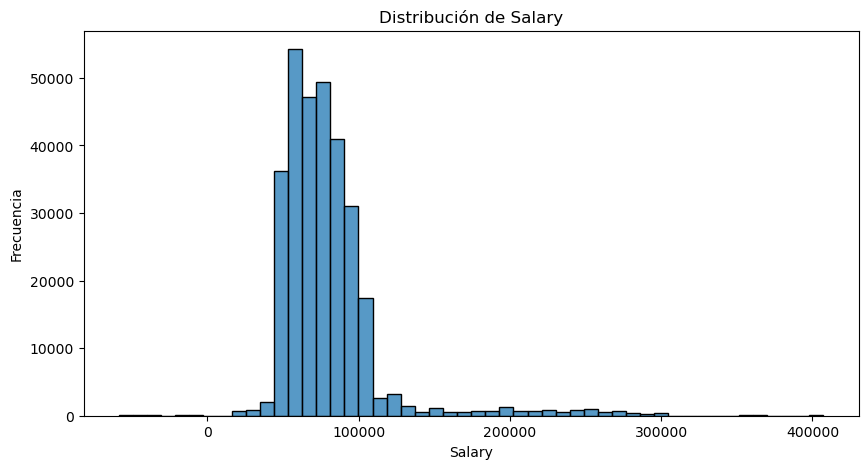

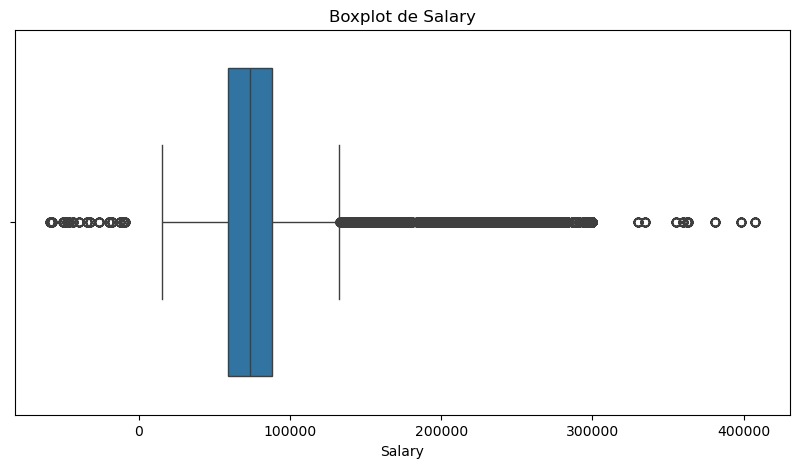

In [5]:
# Eliminamos nulos temporalmente para visualizar mejor
salary_sin_nulos = df["Salary"].dropna()

plt.figure()
sns.histplot(salary_sin_nulos, bins=50)
plt.title("Distribución de Salary")
plt.xlabel("Salary")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
sns.boxplot(x=salary_sin_nulos)
plt.title("Boxplot de Salary")
plt.show()


### Interpretación de la distribución de `Salary`

El histograma muestra que `Salary` está **sesgada hacia la derecha**: la mayoría de salarios se concentran en un rango medio y existe una cola larga de valores altos.

El boxplot identifica muchos valores por encima del límite superior, lo cual sugiere presencia de **outliers**. En salarios esto puede ser esperable (pocos casos con ingresos muy altos), por lo que no se eliminan automáticamente, pero sí se debe tener cuidado con medidas como la **media**, que se ve afectada por estos valores.

✅ Decisión: para el tratamiento de `Salary`, priorizaremos estrategias robustas a outliers, como la **mediana**, y evaluaremos imputación por grupos (por ejemplo, por `Education`) para mantener coherencia con el perfil del cliente.


### 4.3 `Salary` por nivel educativo y patrón de nulos

Antes de decidir la imputación, analizamos:

- Cómo varía el salario según `Education` (para ver si tiene sentido imputar por grupos).
- Qué porcentaje de nulos en `Salary` hay en cada nivel educativo.

Si vemos diferencias claras entre grupos, imputar por mediana de `Education` será una opción más coherente que una mediana global.


📌 SALARY POR EDUCATION (resumen por grupo)
------------------------------------------------------------


,count,median,mean,min,max
Education,,,,,
Doctor,17616,182143.5,178608.897820,48109.0,407228.0
Master,12192,105487.0,103757.848425,56414.0,133080.0
Bachelor,251400,71960.0,72451.061575,-58486.0,105563.0
High School or Below,18768,61915.0,61071.718670,-49830.0,93875.0
College,0,NaN,NaN,NaN,NaN



📌 % NULOS EN SALARY POR EDUCATION
------------------------------------------------------------


,% nulos Salary
Education,
College,100.0
Bachelor,0.0
Doctor,0.0
High School or Below,0.0
Master,0.0


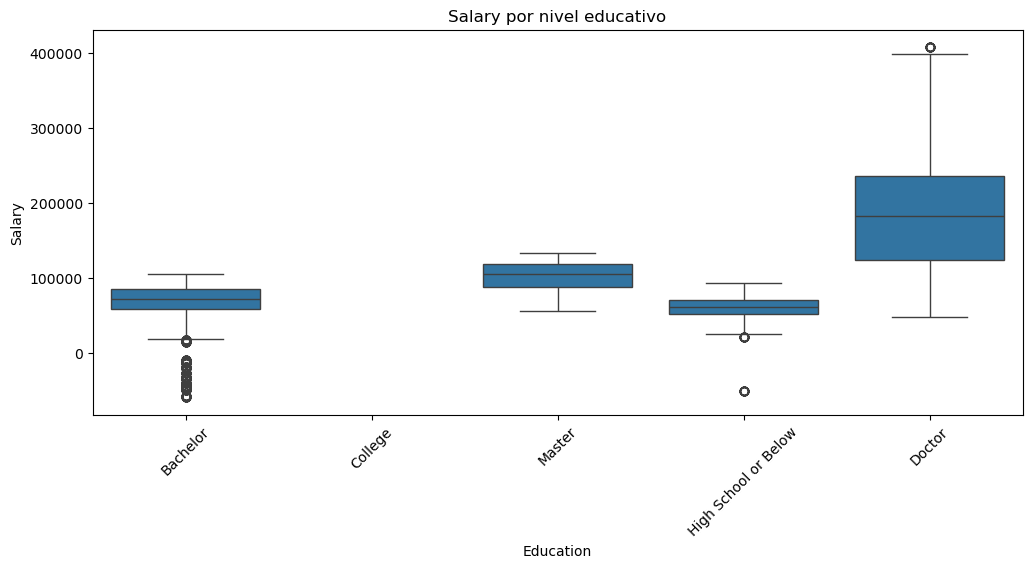

In [6]:
print("📌 SALARY POR EDUCATION (resumen por grupo)")
print("-" * 60)

resumen_edu = (
    df.groupby("Education")["Salary"]
      .agg(["count", "median", "mean", "min", "max"])
      .sort_values("median", ascending=False)
)

display(resumen_edu)

print("\n📌 % NULOS EN SALARY POR EDUCATION")
print("-" * 60)

nulos_salary_edu = (
    df["Salary"].isna()
      .groupby(df["Education"])
      .mean()
      .mul(100)
      .round(2)
      .sort_values(ascending=False)
)

display(nulos_salary_edu.to_frame(name="% nulos Salary"))

# Visual sencillo: boxplot Salary por Education (sin nulos)
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Education", y="Salary")
plt.xticks(rotation=45)
plt.title("Salary por nivel educativo")
plt.show()


### Interpretación y decisión para el tratamiento de `Salary`

El análisis por nivel educativo muestra diferencias claras en `Salary`:

- La mediana de salario aumenta a medida que sube el nivel educativo (Bachelor < Master < Doctor).
- Esto indica que `Education` es una variable relevante para imputar salarios de forma más coherente que usando un único valor global.

Caso especial:
- En el grupo **College** no existen valores de `Salary` informados (`count = 0` y 100% nulos).
  Por tanto, no es posible imputar usando la mediana del propio grupo.

✅ Decisión:
En la fase de limpieza imputaremos `Salary` con la **mediana por nivel educativo** (método robusto ante outliers).  
Para el grupo **College**, aplicaremos un valor de respaldo (fallback), por ejemplo la mediana global o la mediana de un grupo similar (como Bachelor), para no dejar nulos en el dataset final.

### 4.4 Comprobación del caso `College`

Dado que el grupo `College` tiene 100% de nulos en `Salary`, comprobamos cuántas filas representa.
Esto nos ayuda a entender el impacto real de la imputación en ese grupo.

In [7]:
print("📌 TAMAÑO DEL GRUPO EDUCATION = 'College'")
print("-" * 60)

n_college = (df["Education"] == "College").sum()
pct_college = round(n_college / len(df) * 100, 2)

print("Filas con Education = College:", n_college)
print("Porcentaje sobre el total:", pct_college, "%")

print("\n🔎 Vista rápida de filas College (5 ejemplos):")
display(df[df["Education"] == "College"][["Education", "Salary", "Province", "Gender", "Loyalty Card"]].head())

📌 TAMAÑO DEL GRUPO EDUCATION = 'College'
------------------------------------------------------------
Filas con Education = College: 101712
Porcentaje sobre el total: 25.32 %

🔎 Vista rápida de filas College (5 ejemplos):


,Education,Salary,Province,Gender,Loyalty Card
24,College,NaN,Ontario,Male,Nova
25,College,NaN,Ontario,Male,Nova
26,College,NaN,Ontario,Male,Nova
27,College,NaN,Ontario,Male,Nova
28,College,NaN,Ontario,Male,Nova


### Conclusión sobre el caso `College`

El grupo `Education = College` representa un **25,32%** del dataset (101.712 filas) y coincide exactamente con el número de nulos en `Salary`.

Esto indica que los valores nulos de `Salary` **no están distribuidos aleatoriamente**, sino que se concentran completamente en este nivel educativo.

✅ Decisión:
En la fase de limpieza, imputaremos `Salary` específicamente para el grupo `College` usando un criterio robusto y coherente (por ejemplo, la **mediana de un grupo similar como Bachelor**, o una mediana global calculada sin incluir College).  
De este modo evitamos dejar nulos en el dataset final y mantenemos una imputación fácil de explicar y defender.

## 5. Análisis de variables numéricas (actividad de vuelos)

A continuación analizamos las variables numéricas principales relacionadas con la actividad de vuelo:

- `Flights Booked`, `Flights with Companions`, `Total Flights`
- `Distance`
- `Points Accumulated`, `Points Redeemed`, `Dollar Cost Points Redeemed`

En este paso calculamos estadísticas descriptivas básicas para entender rangos, dispersión y valores típicos.
Más adelante revisaremos outliers y correlaciones.

In [8]:
print("📊 ESTADÍSTICAS DESCRIPTIVAS — VARIABLES NUMÉRICAS (ACTIVIDAD)")
print("-" * 70)

cols_numericas = [
    "Flights Booked",
    "Flights with Companions",
    "Total Flights",
    "Distance",
    "Points Accumulated",
    "Points Redeemed",
    "Dollar Cost Points Redeemed"
]

display(df[cols_numericas].describe().T)


📊 ESTADÍSTICAS DESCRIPTIVAS — VARIABLES NUMÉRICAS (ACTIVIDAD)
----------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
Flights Booked,401688.0,4.155374,5.269271,0.0,0.0,1.0,8.0,39.0
Flights with Companions,401688.0,1.041916,2.090835,0.0,0.0,0.0,1.0,20.0
Total Flights,401688.0,5.178156,6.533835,0.0,0.0,1.0,10.0,32.0
Distance,401688.0,1220.725451,1446.440549,0.0,0.0,524.0,2352.0,11244.0
Points Accumulated,401688.0,124.904743,147.982107,0.0,0.0,53.0,240.0,1216.5
Points Redeemed,401688.0,30.997660,126.104987,0.0,0.0,0.0,0.0,996.0
Dollar Cost Points Redeemed,401688.0,2.508848,10.200090,0.0,0.0,0.0,0.0,80.0


### Interpretación de estadísticas descriptivas (actividad)

En general, las variables de actividad muestran muchos **ceros**:

- En `Flights Booked`, el 25% y la mediana están cerca de 0–1 → hay muchos meses sin reservas o con pocas reservas.
- `Flights with Companions` tiene mediana 0 → la mayoría de vuelos no incluyen acompañantes.
- `Points Redeemed` y `Dollar Cost Points Redeemed` tienen mediana 0 → la mayoría de meses no se canjean puntos.
- `Distance` también tiene 25% en 0 → hay meses con actividad nula.

También se observan valores máximos altos (por ejemplo, `Flights Booked` hasta 39 o `Distance` hasta 11.244).  
Esto puede ser normal en clientes muy activos, pero en el siguiente paso revisaremos si existen valores imposibles (negativos) o incoherencias básicas.

In [9]:
print("✅ VALIDACIÓN DE COHERENCIA — VARIABLES NUMÉRICAS")
print("-" * 70)

cols_check = [
    "Flights Booked",
    "Flights with Companions",
    "Total Flights",
    "Distance",
    "Points Accumulated",
    "Points Redeemed",
    "Dollar Cost Points Redeemed"
]

# 1) Negativos en variables numéricas
print("🔎 Valores negativos por columna")
for col in cols_check:
    n_neg = (df[col] < 0).sum()
    print(f"- {col}: {n_neg}")

# 2) Mes fuera de rango
mes_fuera = ((df["Month"] < 1) | (df["Month"] > 12)).sum()
print("\n📅 Mes fuera de rango (1-12):", mes_fuera)

# 3) Año fuera de rango esperado (según lo visto: 2017-2018)
anio_fuera = ((df["Year"] < 2017) | (df["Year"] > 2018)).sum()
print("📅 Año fuera de rango (2017-2018):", anio_fuera)

# 4) Chequeo simple de consistencia: Flights with Companions no debería superar Total Flights
inconsistencia_comp = (df["Flights with Companions"] > df["Total Flights"]).sum()
print("\n🧩 Inconsistencias (Flights with Companions > Total Flights):", inconsistencia_comp)


✅ VALIDACIÓN DE COHERENCIA — VARIABLES NUMÉRICAS
----------------------------------------------------------------------
🔎 Valores negativos por columna
- Flights Booked: 0
- Flights with Companions: 0
- Total Flights: 0
- Distance: 0
- Points Accumulated: 0
- Points Redeemed: 0
- Dollar Cost Points Redeemed: 0

📅 Mes fuera de rango (1-12): 0
📅 Año fuera de rango (2017-2018): 0

🧩 Inconsistencias (Flights with Companions > Total Flights): 0


### Interpretación de la validación de coherencia

Los resultados indican que las variables numéricas de actividad son coherentes:

- No existen valores negativos en ninguna métrica de vuelos, distancia o puntos.
- `Month` está siempre entre 1 y 12.
- `Year` se mantiene en el rango esperado (2017–2018).
- No hay inconsistencias entre `Flights with Companions` y `Total Flights`.

Conclusión:
La parte de actividad de vuelos no presenta errores evidentes que requieran corrección.  
Las decisiones de limpieza se centrarán principalmente en el tratamiento de `Salary` y en cómo representar correctamente la información de cancelación.

## 6. Revisión rápida de variables categóricas (posibles erratas)

Antes de la limpieza final, revisamos las variables categóricas más importantes para detectar:

- Valores escritos de forma distinta (mayúsculas/minúsculas, espacios).
- Categorías inesperadas.
- Cardinalidad (cuántos valores distintos hay).

Esto nos ayuda a decidir si necesitamos normalizar texto (por ejemplo, aplicar `strip()` o unificar mayúsculas) en el notebook de limpieza.

In [10]:
# =========================================
# 6) Revisión rápida de categóricas (sanity check)
# =========================================

categoricas = [
    "Country",
    "Province",
    "City",
    "Gender",
    "Education",
    "Marital Status",
    "Loyalty Card",
    "Enrollment Type"
]

print("🔎 REVISIÓN DE CATEGÓRICAS (nº de valores únicos + ejemplos)")
print("-" * 70)

for col in categoricas:
    print(f"\n📌 {col}")
    print("-" * 40)
    print("Valores únicos:", df[col].nunique())
    print("\nTop 10 valores más frecuentes:")
    display(df[col].value_counts().head(10).to_frame(name="frecuencia"))


🔎 REVISIÓN DE CATEGÓRICAS (nº de valores únicos + ejemplos)
----------------------------------------------------------------------

📌 Country
----------------------------------------
Valores únicos: 1

Top 10 valores más frecuentes:


,frecuencia
Country,
Canada,401688



📌 Province
----------------------------------------
Valores únicos: 11

Top 10 valores más frecuentes:


,frecuencia
Province,
Ontario,129696
British Columbia,105816
Quebec,79200
Alberta,23256
Manitoba,15792
New Brunswick,15264
Nova Scotia,12432
Saskatchewan,9816
Newfoundland,6192



📌 City
----------------------------------------
Valores únicos: 29

Top 10 valores más frecuentes:


,frecuencia
City,
Toronto,80424
Vancouver,61968
Montreal,49416
Winnipeg,15792
Whistler,13968
Halifax,12432
Ottawa,12216
Edmonton,11664
Trenton,11664



📌 Gender
----------------------------------------
Valores únicos: 2

Top 10 valores más frecuentes:


,frecuencia
Gender,
Female,201840
Male,199848



📌 Education
----------------------------------------
Valores únicos: 5

Top 10 valores más frecuentes:


,frecuencia
Education,
Bachelor,251400
College,101712
High School or Below,18768
Doctor,17616
Master,12192



📌 Marital Status
----------------------------------------
Valores únicos: 3

Top 10 valores más frecuentes:


,frecuencia
Marital Status,
Married,233640
Single,107616
Divorced,60432



📌 Loyalty Card
----------------------------------------
Valores únicos: 3

Top 10 valores más frecuentes:


,frecuencia
Loyalty Card,
Star,183288
Nova,136104
Aurora,82296



📌 Enrollment Type
----------------------------------------
Valores únicos: 2

Top 10 valores más frecuentes:


,frecuencia
Enrollment Type,
Standard,378384
2018 Promotion,23304


### Conclusión sobre las variables categóricas

Tras revisar las variables categóricas principales (`Country`, `Province`, `City`, `Gender`, `Education`, `Marital Status`, `Loyalty Card`, `Enrollment Type`), no se observan:

- Categorías duplicadas por mayúsculas/minúsculas.
- Valores inesperados o erratas evidentes.
- Cardinalidades incoherentes.

En general, las categorías parecen limpias y consistentes.

✅ Decisión:
No se realizará una transformación del contenido de las variables categóricas.

Sin embargo, en el notebook de limpieza se aplicará un `strip()` de forma preventiva para eliminar posibles espacios en blanco al inicio o final del texto, aunque no se hayan detectado inconsistencias visibles.

De esta forma mantenemos los datos originales y garantizamos coherencia sin modificar innecesariamente las categorías.
